<p style="font-family: Arial; font-size:3.60em;color:purple; font-style:bold"><br>
A First Application: Classifying Iris
Species
</p><br>

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>
Simple machine learning application and creation of first model
</p><br>
Introduction of some core concepts and terms

<b>Goal:</b><br>
Building a machine learning model that can learn from the measurements of the irises and species is known, so that we can predict the species for a new iris.

<b>Data:</b><br>

Some measurements associated with each iris: the length and width of the petals and the length and width
of the sepals, all measured in centimeters.

Species <i> Setosa, Versicolor, or Virginica.</i> <br>


<b>Model Type:</b><br>Supervised Machine learning: Because we have measurements for which we know the correct species of iris.

<b>Model Type: </b><br> Classification: The possible outputs (different species of irises) are called classes.Every iris in
the dataset belongs to one of three classes, so this problem is a three-class classifi-
cation problem

 <p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>
Meet the data

In [80]:
#Importing
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [18]:
#Loading the data
iris_dataset = load_iris()

#Using the keys function to get to know the data
print ("Iris dataset", iris_dataset.keys()) #The data is a dictionary DICT
print ("Iris dataset", dir(iris_dataset)) #Another way of exploring the data type

Iris dataset dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
Iris dataset ['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [16]:
#Exploring the type of dataset
print("Data type", type(iris_dataset.data))
print("Target type", type(iris_dataset.target))
print("Frame type", type(iris_dataset.frame))
print("Target_names", type(iris_dataset.target_names))
print("DESCR", type(iris_dataset.DESCR))
print("features_names", type(iris_dataset.feature_names))
print("file name", type(iris_dataset.filename))

Data type <class 'numpy.ndarray'>
Target type <class 'numpy.ndarray'>
Frame type <class 'NoneType'>
Target_names <class 'numpy.ndarray'>
DESCR <class 'str'>
features_names <class 'list'>
file name <class 'str'>


In [42]:
#Exploring the data
print("Data:", iris_dataset['data'])
print("Target:", iris_dataset['target'])
print("Target names:", iris_dataset['target_names'])
print("DESCR:", iris_dataset['DESCR'][:193])
print("Feature names:", iris_dataset['feature_names'])
print("File name:", iris_dataset['filename'])

Data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 

In [37]:
#Getting to know how many attributes and Instances are in the data and target 
print("Shape of data:", iris_dataset['data'].shape) #Containing 150 flowers with 4 types of measurements each
print("Shape of target:", iris_dataset['target'].shape) #Contains the types of flowers


Shape of data: (150, 4)
Shape of target: (150,)


 <p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>
 Measuring Success: Training and Testing Data
    
To assess the model’s performance, we show it new data (data that it hasn’t seen
before) for which we have labels. This is usually done by splitting the labeled data
we have collected (here, our 150 flower measurements) into two parts. One part
of the data is used to build our machine learning model, and is called the training
data or training set. The rest of the data will be used to assess how well the model
works; this is called the test data, test set, or hold-out set.

Scikit-learn contains a function that shuffles the dataset and splits it for you:
the train_test_split function. This function extracts 75% of the rows in the
data as the training set, together with the corresponding labels for this data. The
remaining 25% of the data, together with the remaining labels, is declared as the
test set. 

Before making the split, the train_test_split function shuffles the dataset using a pseudorandom number generator.

To make sure that we will get the same output if we run the same function several
times, we provide the pseudorandom number generator with a fixed seed using
the random_state parameter. This will make the outcome deterministic, so this
line will always have the same outcome.

In [49]:
#X is the measurements of the flowers and Y is the type of flowers. f(x) = y therefore x is the data and y the target.
X_train, x_test, Y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [55]:
print("X_train", X_train.shape)
print("x_test", x_test.shape)
print("Y_train", Y_train.shape)
print("y_test", y_test.shape)


X_train (112, 4)
x_test (38, 4)
Y_train (112,)
y_test (38,)


 <p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>
 First things first:Look at your data

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

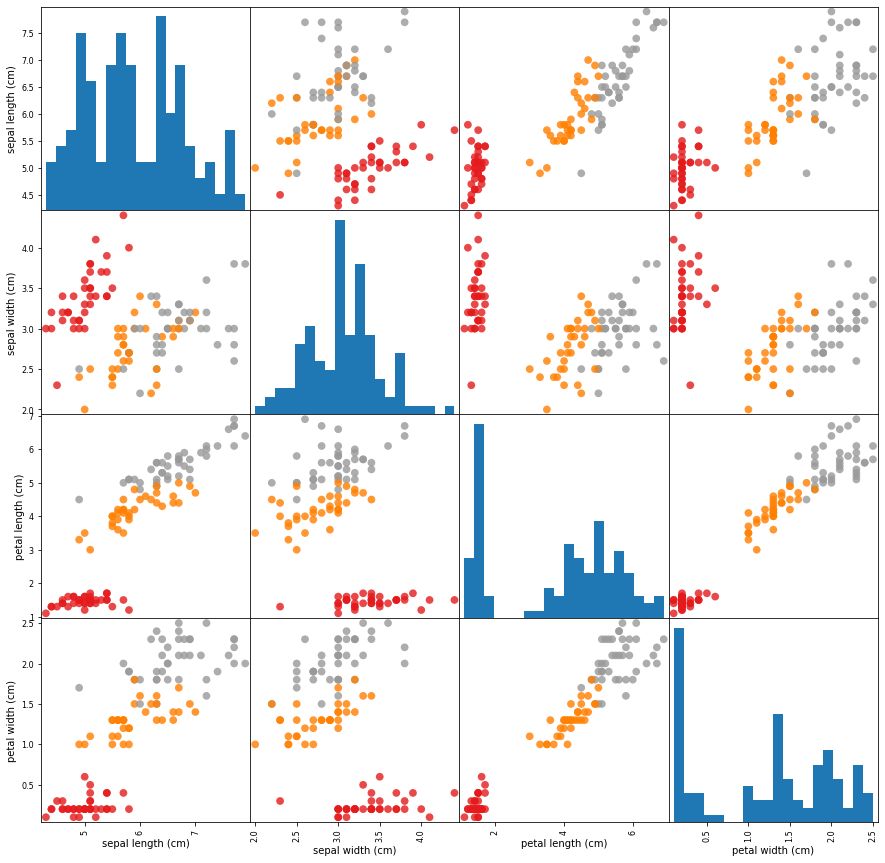

In [72]:
#Creating a dataframe for the array and using to label the columns with de feature names attribute of the iris dataset

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

#Creating a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=Y_train, figsize=(15, 15), marker='-bo', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap='Set1')
#A pair plot, looks at all possible pairs of features. 

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>
Building Your First Model: k-Nearest Neighbors

To make a prediction for a new data point,
the algorithm finds the point in the training set that is closest to the new point.
Then it assigns the label of this training point to the new data point.
    
The k in k-nearest neighbors signifies that instead of using only the closest neighbor to the new data point, we can consider any fixed number k of neighbors in the training (for example, the closest three or five neighbors).

In [76]:
#Setting up the number of neighbors with the n_neighbors
#The knn object encapsulates the algorithm that will be used to build the model from the training data
#As well the algorithm to make predictions on new data points.
knn = KNeighborsClassifier(n_neighbors=1)

In [77]:
#To build the model on the training set, we call the fit method of the knn object

knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>
Making the prediction
    
Imagine we found an iris in the wild with a sepal
length of 5 cm, a sepal width of 2.9 cm, a petal length of 1 cm, and a petal width of
0.2 cm. What species of iris would this be?

In [83]:
#New flower found with the 4 attributes. Needs to be an array as the data in iris_dataset is an array.
#and as scikit-learn always expects two-dimensional array for the data.
X_new = np.array([[5, 2.9, 1, 0.2]])

In [87]:
#To make the prediction we call the function predict 
prediction = knn.predict(X_new)
print("prediction", prediction, "Predicted target name:",
iris_dataset['target_names'][prediction])

prediction [0] Predicted target name: ['setosa']


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>
Evaluating the model
    
This is where the test set that we created earlier comes in. This data was not used to build the model. Therefore, we can make a prediction for each iris in the test data and compare it against its label (the known species). We can measure how well the model works by computing the accuracy, which is the fraction of flowers for which the right species was predicted:

In [92]:
#Predicting with using the 25% of the data measurements
y_pred = knn.predict(x_test)
print("Prediction of the test data", y_pred, "Predicted target name:",
iris_dataset['target_names'][y_pred])

Prediction of the test data [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2] Predicted target name: ['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor' 'setosa' 'virginica' 'virginica' 'versicolor' 'setosa'
 'virginica']


In [97]:
#Evaluating the accuracy of the model

#Method 1 by using the mean between the prediction and y_test
print("Test set score:", np.mean(y_pred == y_test))

#Method 2 by using score method of the knn object

print("Test set score", knn.score(x_test, y_test))

Test set score: 0.9736842105263158
Test set score 0.9736842105263158


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>
Core Code
    
Use for applying any machine learning algorithm using scikit-learn . The fit , predict , and score methods are the common interface to supervised models in scikit-learn.
